In [1]:
import hist
import numpy as np
import matplotlib.pyplot as plt

# ND Histograms

## More dimensions

The same API works for multiple dimensions.

In [8]:
h = hist.Hist(
    hist.axis.Regular(150, -1.5, 1.5),
    hist.axis.Regular(100, -1, 1)
)

In [9]:
def make_2D_data(*, mean=(0,0), widths=(1,1), size=1_000_000):
    cov = np.asarray(widths) * np.eye(2)
    return np.random.multivariate_normal(mean, cov, size=size).T

In [10]:
data3x = make_2D_data(mean=[-.75, .5], widths=[.2, 0.02])
data3y = make_2D_data(mean=[.75, .5], widths=[.2, 0.02])

From here on out, I will be using `.reset()` before a `.fill()`, just to make sure each cell in the notebook can be rerun.

In [14]:
h.reset()
h.fill(*data3x)
h.fill(*data3y)
h[::5j, ::5j]

Hist(
  Regular(30, -1.5, 1.5, label='Axis 0'),
  Regular(20, -1, 1, label='Axis 1'),
  storage=Double()) # Sum: 1906255.0 (2000000.0 with flow)

Again, let's make plotting a little function:

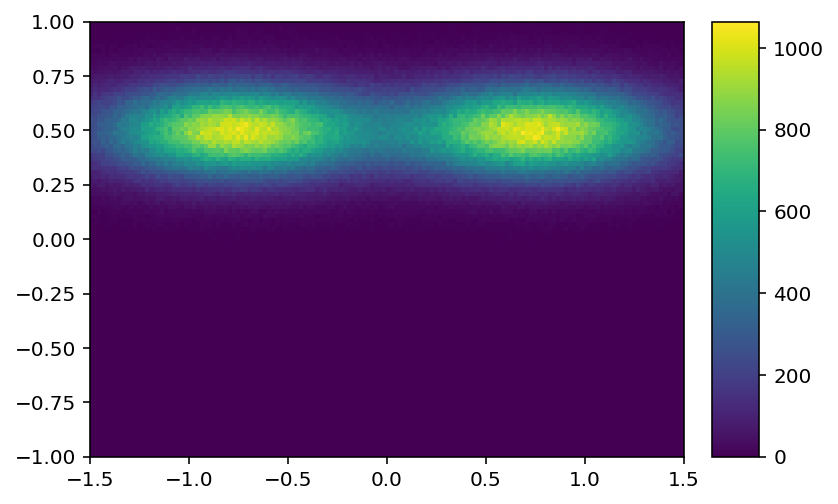

In [13]:
h.plot();

Let's try a 3D histogram

In [16]:
data3d = [np.random.normal(size=1_000_000) for _ in range(3)]

hist3d = hist.Hist(
    hist.axis.Regular(150, -5, 5),
    hist.axis.Regular(100, -5, 5),
    hist.axis.Regular(100, -5, 5)
)

hist3d.fill(*data3d)

Hist(
  Regular(150, -5, 5, label='Axis 0'),
  Regular(100, -5, 5, label='Axis 1'),
  Regular(100, -5, 5, label='Axis 2'),
  storage=Double()) # Sum: 999998.0 (1000000.0 with flow)

Let's project to the first two axes:

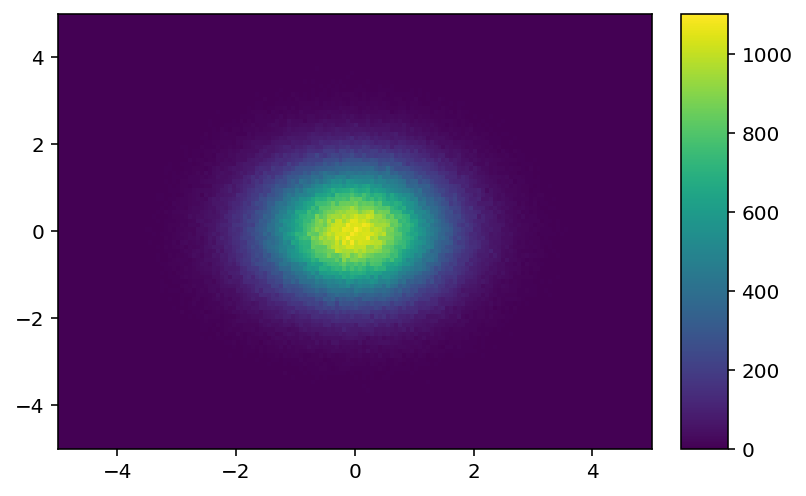

In [18]:
hist3d.project(0,1).plot();

## 2.2: UHI

Let's explore the boost-histogram UHI syntax. We will reuse the previous 2D histogram from part 3:

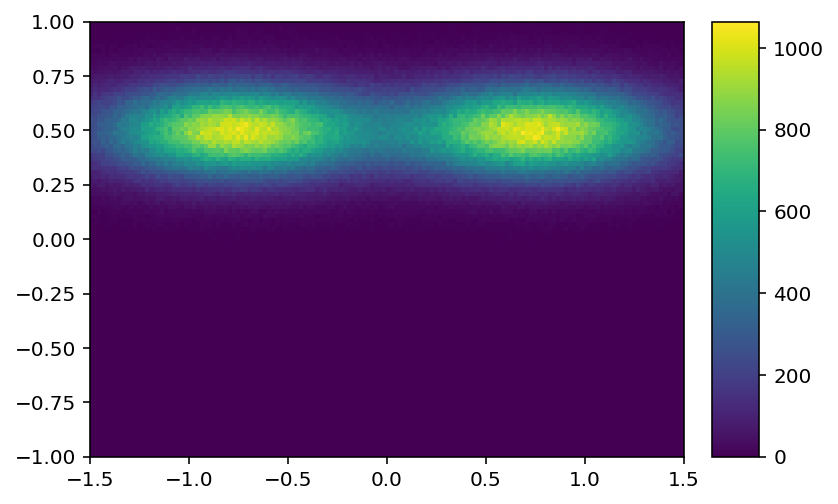

In [20]:
h.plot();

I can see that I want y from 0.25 to 0.75, in data coordinates:

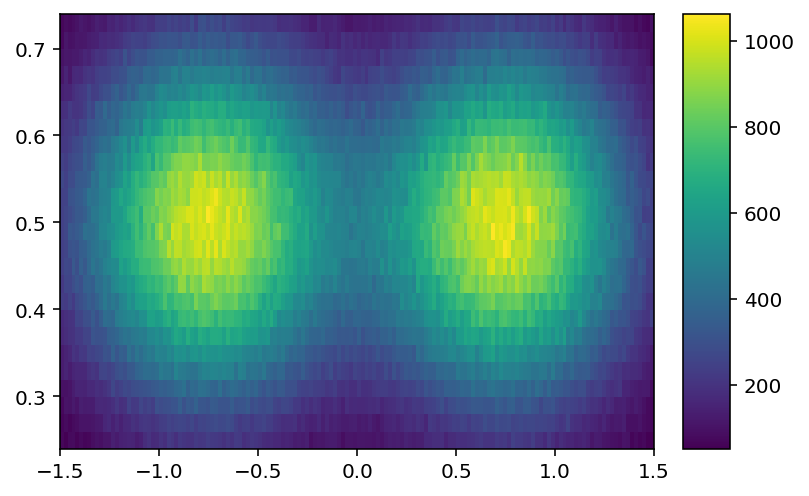

In [22]:
h[:, .25j:.75j].plot();

What's the contents of a bin?

In [12]:
hist3[100,87]

196.0

How about in data coordinates?

In [23]:
hist3[.5j, .75j]

170.0

> Note: to get the coordinates manually:
> 
> ```python
hist3.axes[0].index(.5) == 100
hist3.axes[1].index(.75) == 87
```

How about a 1d histogram?

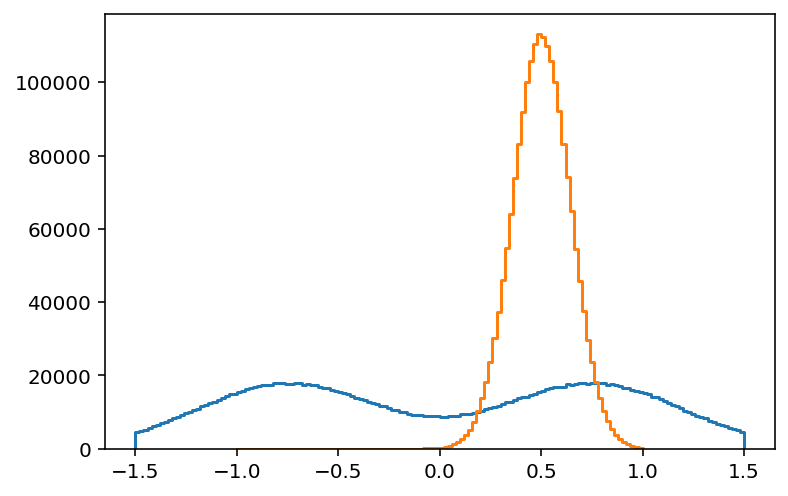

In [25]:
hist3[:, ::sum].plot();
hist3[::sum, :].plot();

Let's look at one part and rebin:

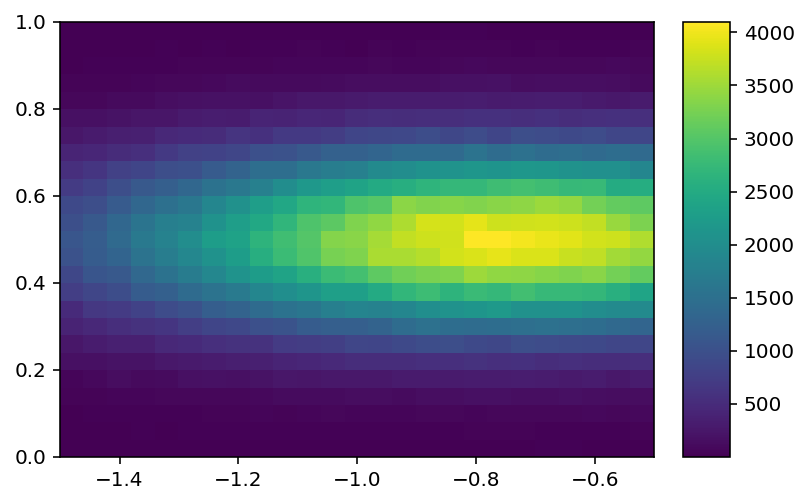

In [26]:
hist3[:50:2j, 50::2j].plot();

What is the value at `(-.75, .5)`?

In [27]:
hist3[-.75j, .5j]

1027.0